In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset
df=pd.read_csv("Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X=df.iloc[:,[3,4]].values

In [7]:
# We are using Elbow method to find optimal number of cluster 

In [9]:
from sklearn.cluster import KMeans

In [13]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

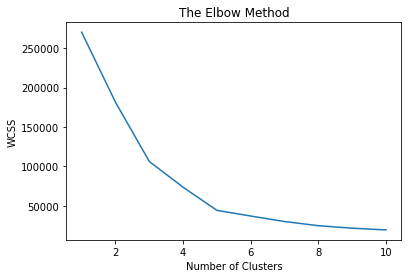

In [15]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# by observing above diagram at k=5 we get less wcss value so we can select K=5  

In [18]:
# fitting kmeans to the dataset
kmeans=KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans=kmeans.fit_predict(X)

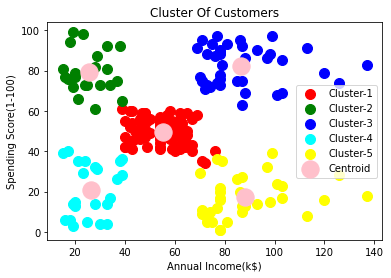

In [24]:
# Visualise the clusters
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100,c='red',label='Cluster-1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100,c='green',label='Cluster-2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100,c='blue',label='Cluster-3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=100,c='cyan',label='Cluster-4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=100,c='yellow',label='Cluster-5')
# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='pink',label='Centroid')
plt.title('Cluster Of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()